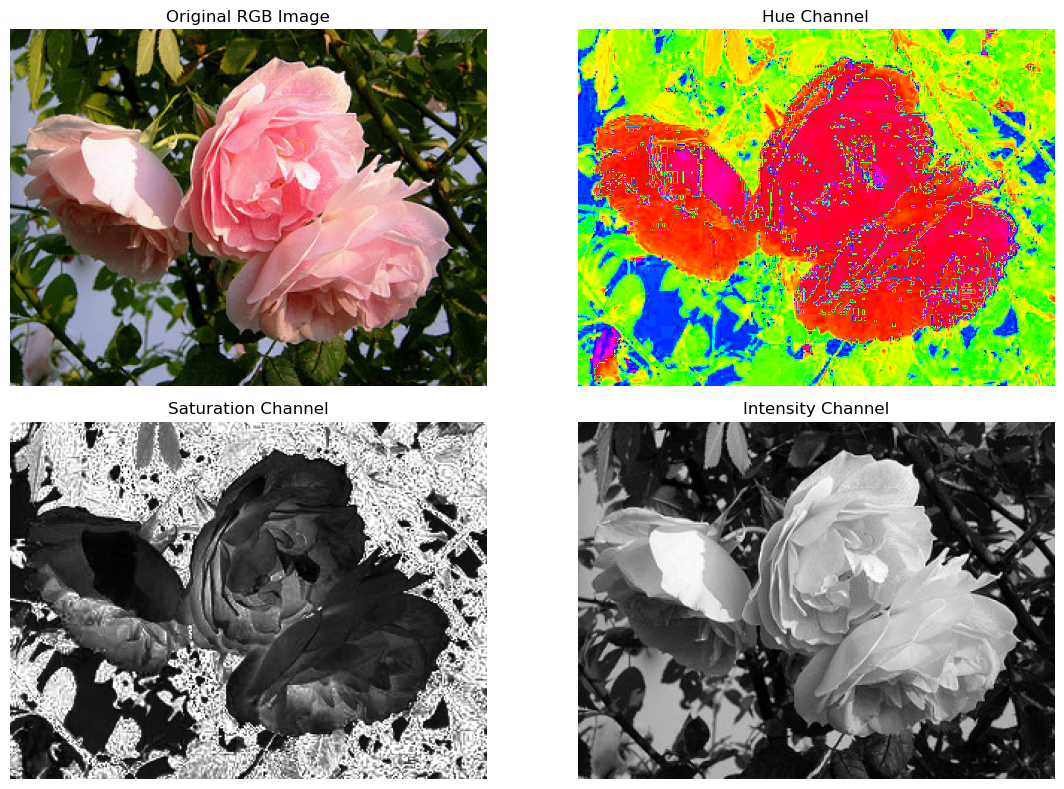

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def rgb_to_hsi(image):
    """
    Converts an RGB image to HSI color space.
    Returns the Hue, Saturation, and Intensity channels separately.
    """
    # Normalize the RGB image to the range [0, 1] for calculations
    rgb_norm = image / 255.0
    R, G, B = rgb_norm[:, :, 0], rgb_norm[:, :, 1], rgb_norm[:, :, 2]  # Extract R, G, B channels

    # Calculate the Intensity channel (average of R, G, and B)
    I = (R + G + B) / 3

    # Calculate the Saturation channel
    # S = 1 - (min(R, G, B) / I)
    min_RGB = np.minimum(np.minimum(R, G), B)  # Find the minimum value among R, G, B for each pixel
    S = 1 - (min_RGB / (I + 1e-6))  # Add a small value (epsilon) to avoid division by zero
    S[I == 0] = 0  # Explicitly set S to 0 for pixels where intensity (I) is 0

    # Calculate the Hue channel
    # Numerator and denominator for the arccosine formula used to calculate Hue
    numerator = 0.5 * ((R - G) + (R - B))
    denominator = np.sqrt((R - G) ** 2 + (R - B) * (G - B))
    theta = np.arccos(numerator / (denominator + 1e-6))  # Add epsilon to avoid division by zero

    # Initialize Hue with theta and adjust for cases where Blue > Green
    H = np.copy(theta)  # Copy theta values
    H[B > G] = 2 * np.pi - H[B > G]  # If Blue > Green, adjust the Hue value
    H = H / (2 * np.pi)  # Normalize Hue to the range [0, 1]

    # Return the three HSI channels
    return H, S, I

# Specify the path to the image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')  # Replace with your image path
#image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')

# Load the image using OpenCV (in BGR format by default)
rgb_image = cv2.imread(image_path)

# Convert the image from BGR (OpenCV format) to RGB
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)

# Convert the RGB image to HSI color space
H, S, I = rgb_to_hsi(rgb_image)

# Plot the original RGB image and the H, S, and I channels
plt.figure(figsize=(12, 8))

# Display the original RGB image
plt.subplot(2, 2, 1)
plt.imshow(rgb_image)
plt.title("Original RGB Image")
plt.axis("off")  # Turn off axis labels for better visualization

# Display the Hue channel
plt.subplot(2, 2, 2)
plt.imshow(H, cmap="hsv")  # Use HSV colormap to represent Hue visually
plt.title("Hue Channel")
plt.axis("off")

# Display the Saturation channel
plt.subplot(2, 2, 3)
plt.imshow(S, cmap="gray")  # Use grayscale colormap for Saturation
plt.title("Saturation Channel")
plt.axis("off")

# Display the Intensity channel
plt.subplot(2, 2, 4)
plt.imshow(I, cmap="gray")  # Use grayscale colormap for Intensity
plt.title("Intensity Channel")
plt.axis("off")

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()
